In [445]:
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

--2025-11-30 01:18:42--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt.5’

names.txt.5         100%[===================>] 222.80K  --.-KB/s    in 0.003s  

2025-11-30 01:18:42 (66.4 MB/s) - ‘names.txt.5’ saved [228145/228145]



In [446]:
noms = open('names.txt', 'r').read().splitlines()
print(noms[:10])
print(len(noms))

print(f"Plus court nom: {min(len(nom) for nom in noms)}")
print(f"Plus long nom: {max(len(nom) for nom in noms)}")

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']
32033


In [448]:
dic = {}
for nom in noms:
  cs = ['<S>'] + list(nom) + ['<E>']
  for c1, c2 in zip(cs , cs[1:]):
    bigram = (c1,c2)
    dic[bigram] =dic.get(bigram, 0) + 1

In [449]:
sorted(dic.items(), key = lambda valeur: -valeur[1])[:10]

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963)]

In [450]:
import torch
N = torch.zeros((27,27), dtype=torch.int32)

In [451]:
caractères = sorted(list(set(''.join(noms))))
c_to_i = {c:i + 1 for i,c in enumerate(caractères)}
c_to_i['.'] = 0
i_to_c = {i:s for s,i in c_to_i.items()}

In [452]:
for nom in noms:
  cs = ['.'] + list(nom) + ['.']
  for c1, c2 in zip(cs , cs[1:]):
    indice_c1 = c_to_i[c1]
    indice_c2 = c_to_i[c2]
    N[indice_c1, indice_c2] += 1

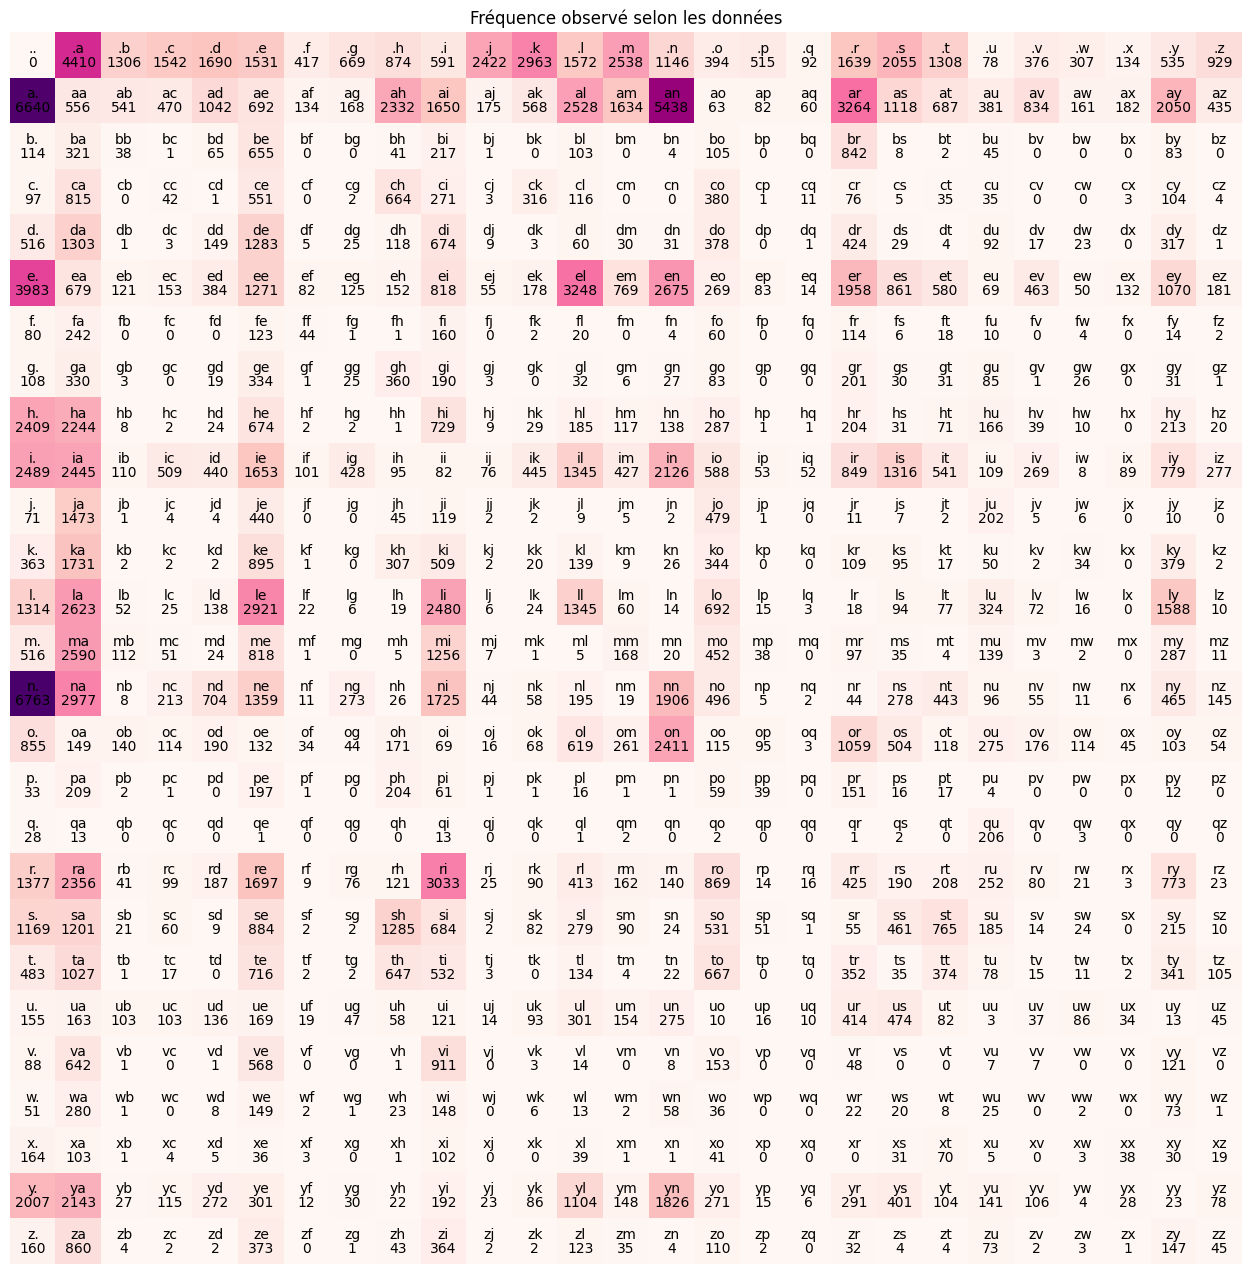

In [453]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='RdPu')
for i in range(27):
  for j in range(27):
    lettres = i_to_c[i] + i_to_c[j]
    plt.text(j,i,lettres, ha='center', va="bottom")
    plt.text(j,i,N[i, j].item(), ha='center', va="top")
plt.axis('off')
plt.title("Fréquence observé selon les données")
plt.show()

# Génération de noms avec les probabilités observées

In [454]:
P = (N+1).float() # 1+ pour ne pas avoir log(0) = -inf
P /= P.sum(1, keepdim=True)
g = torch.Generator().manual_seed(22)

for i in range(5):
  i = 0
  retour = []
  while True:
    p = P[i]
    i = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    retour.append(i_to_c[i])
    if i == 0:
      break
  print(''.join(retour))

ff.
bridslo.
raieviamanthylesh.
rd.
gan.


In [455]:
log_vraisemblance = 0.0
n = 0
for nom in noms[:]:
  cs = ['.'] + list(nom) + ['.']
  for c1, c2 in zip(cs , cs[1:]):
    indice_c1 = c_to_i[c1]
    indice_c2 = c_to_i[c2]
    proba = P[indice_c1, indice_c2]
    logproba = torch.log(proba)
    log_vraisemblance += logproba
    n+=1
    #print(f"{c1}{c2}: {proba:.4f} {logproba:.4f}")
print(f"La log-vraisemblance est {log_vraisemblance.item():.4f}")
log_vraisemblance_négative = -log_vraisemblance
print(f"{log_vraisemblance_négative/n:.4f}")

La log-vraisemblance est -559951.5625
2.4544


In [456]:
log_vraisemblance = 0.0
n= 0
for lettre in ["mathieu"]:
  cs = ['.'] + list(lettre) + ['.']
  for c1, c2 in zip(cs , cs[1:]):
    indice_c1 = c_to_i[c1]
    indice_c2 = c_to_i[c2]
    proba = P[indice_c1, indice_c2]
    logproba = torch.log(proba)
    log_vraisemblance += logproba
    print(f"{c1}{c2}: {proba:.4f} {logproba:.4f}")
    n+=1
log_vraisemblance_négative = -log_vraisemblance
print(f"{log_vraisemblance_négative/n:.4f}")

.m: 0.0792 -2.5358
ma: 0.3885 -0.9454
at: 0.0203 -3.8977
th: 0.1158 -2.1561
hi: 0.0955 -2.3485
ie: 0.0933 -2.3719
eu: 0.0034 -5.6772
u.: 0.0493 -3.0091
2.8677


In [457]:
xs, ys = [] , []

for nom in noms[:1]:
  cs = ['.'] + list(nom) + ['.']
  for c1, c2 in zip(cs , cs[1:]):
    indice_c1 = c_to_i[c1]
    indice_c2 = c_to_i[c2]
    xs.append(indice_c1)
    ys.append(indice_c2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [458]:
xs

tensor([ 0,  5, 13, 13,  1])

In [459]:
ys

tensor([ 5, 13, 13,  1,  0])

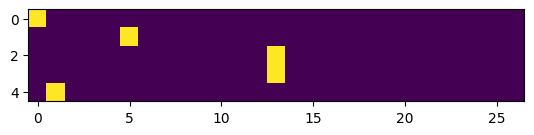

In [460]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
plt.imshow(xenc)

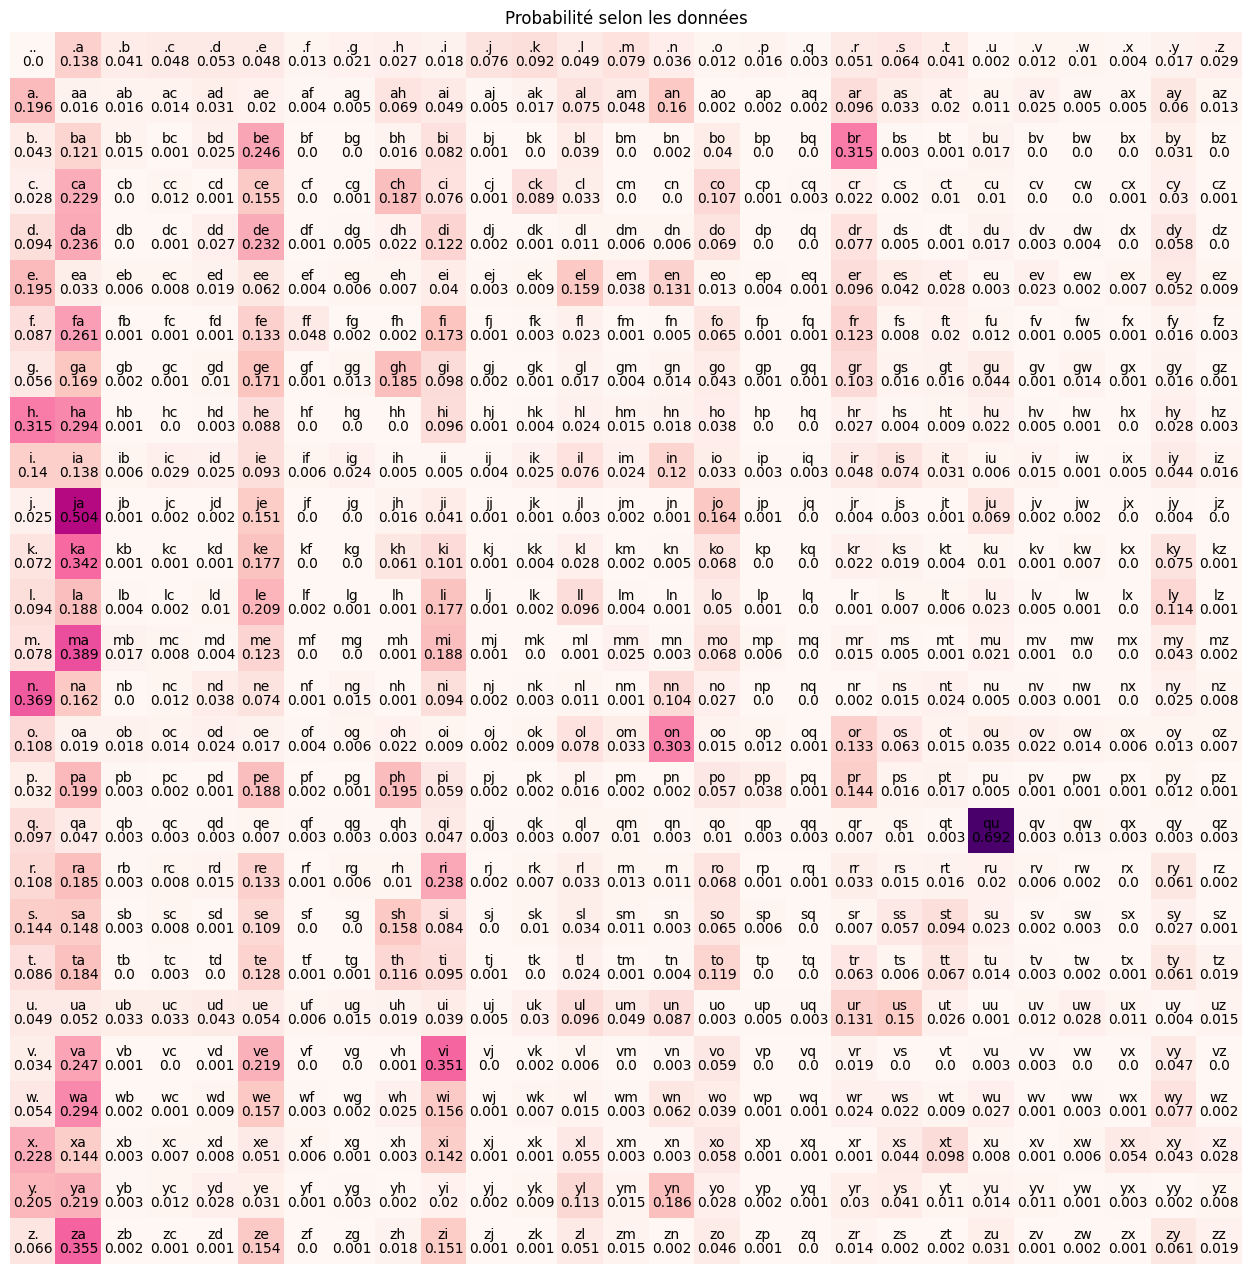

In [461]:
plt.figure(figsize=(16,16))
plt.imshow(P, cmap='RdPu')
for i in range(27):
  for j in range(27):
    lettres = i_to_c[i] + i_to_c[j]
    plt.text(j,i,lettres, ha='center', va="bottom")
    n = round(P[i, j].item(), 3)
    plt.text(j,i,n , ha='center', va="top")
plt.axis('off')
plt.title("Probabilité selon les données")
plt.show()

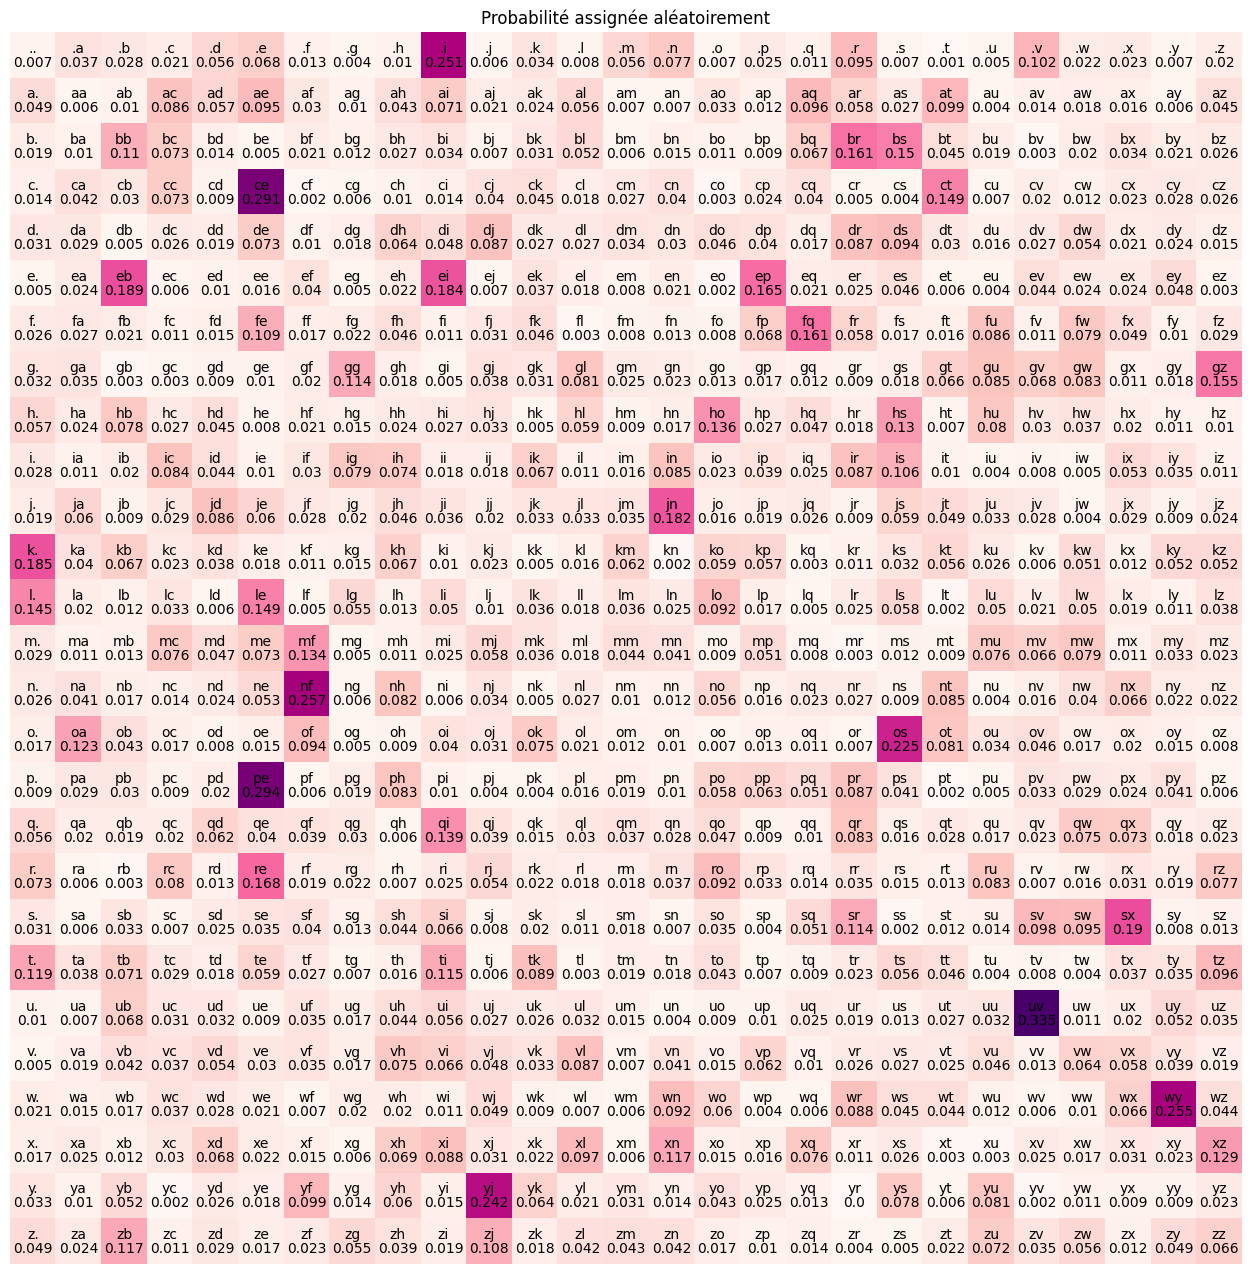

In [462]:
W = torch.randn((27,27), generator=g)
logits = xenc @ W
comptes = logits.exp()
proba = comptes / comptes.sum(1, keepdim=True)


plt.figure(figsize=(16,16))
proba_W = W.exp() / W.exp().sum(1, keepdim=True)
plt.imshow(proba_W, cmap='RdPu')
for i in range(27):
  for j in range(27):
    lettres = i_to_c[i] + i_to_c[j]
    plt.text(j,i,lettres, ha='center', va="bottom")
    n = round(proba_W[i, j].item(), 3)
    plt.text(j,i,n , ha='center', va="top")
plt.axis('off')
plt.title("Probabilité assignée aléatoirement")
plt.show()

# Étape d'entraînement avec descente du gradient

In [463]:
xs, ys = [] , []

for nom in noms[:]:
  cs = ['.'] + list(nom) + ['.']
  for c1, c2 in zip(cs , cs[1:]):
    indice_c1 = c_to_i[c1]
    indice_c2 = c_to_i[c2]
    xs.append(indice_c1)
    ys.append(indice_c2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

W = torch.randn((27,27), generator=g, requires_grad=True)

In [464]:
for _ in range(20):

  # Passe avant
  xenc = F.one_hot(xs, num_classes=27).float()
  logits = xenc @ W
  comptes = logits.exp()
  proba = comptes / comptes.sum(1, keepdim=True)
  perte = -proba[torch.arange(num), ys].log().mean()
  print(perte.item())

  # Passe arrière
  W.grad = None
  perte.backward()

  # Mise à jour
  W.data += -50 * W.grad

3.9090027809143066
3.4502649307250977
3.18251371383667
3.021087169647217
2.921790599822998
2.8513786792755127
2.7977089881896973
2.755747079849243
2.722393751144409
2.695486307144165
2.6734187602996826
2.654998779296875
2.6393637657165527
2.625898599624634
2.6141624450683594
2.6038336753845215
2.5946710109710693
2.5864903926849365
2.579145669937134
2.572519540786743


In [465]:
for _ in range(200):

  # Passe avant
  xenc = F.one_hot(xs, num_classes=27).float()
  logits = xenc @ W
  comptes = logits.exp()
  proba = comptes / comptes.sum(1, keepdim=True)
  perte = -proba[torch.arange(num), ys].log().mean()
  #print(perte.item())

  # Passe arrière
  W.grad = None
  perte.backward()

  # Mise à jour
  W.data += -30 * W.grad

In [466]:
perte.item()

2.4671030044555664

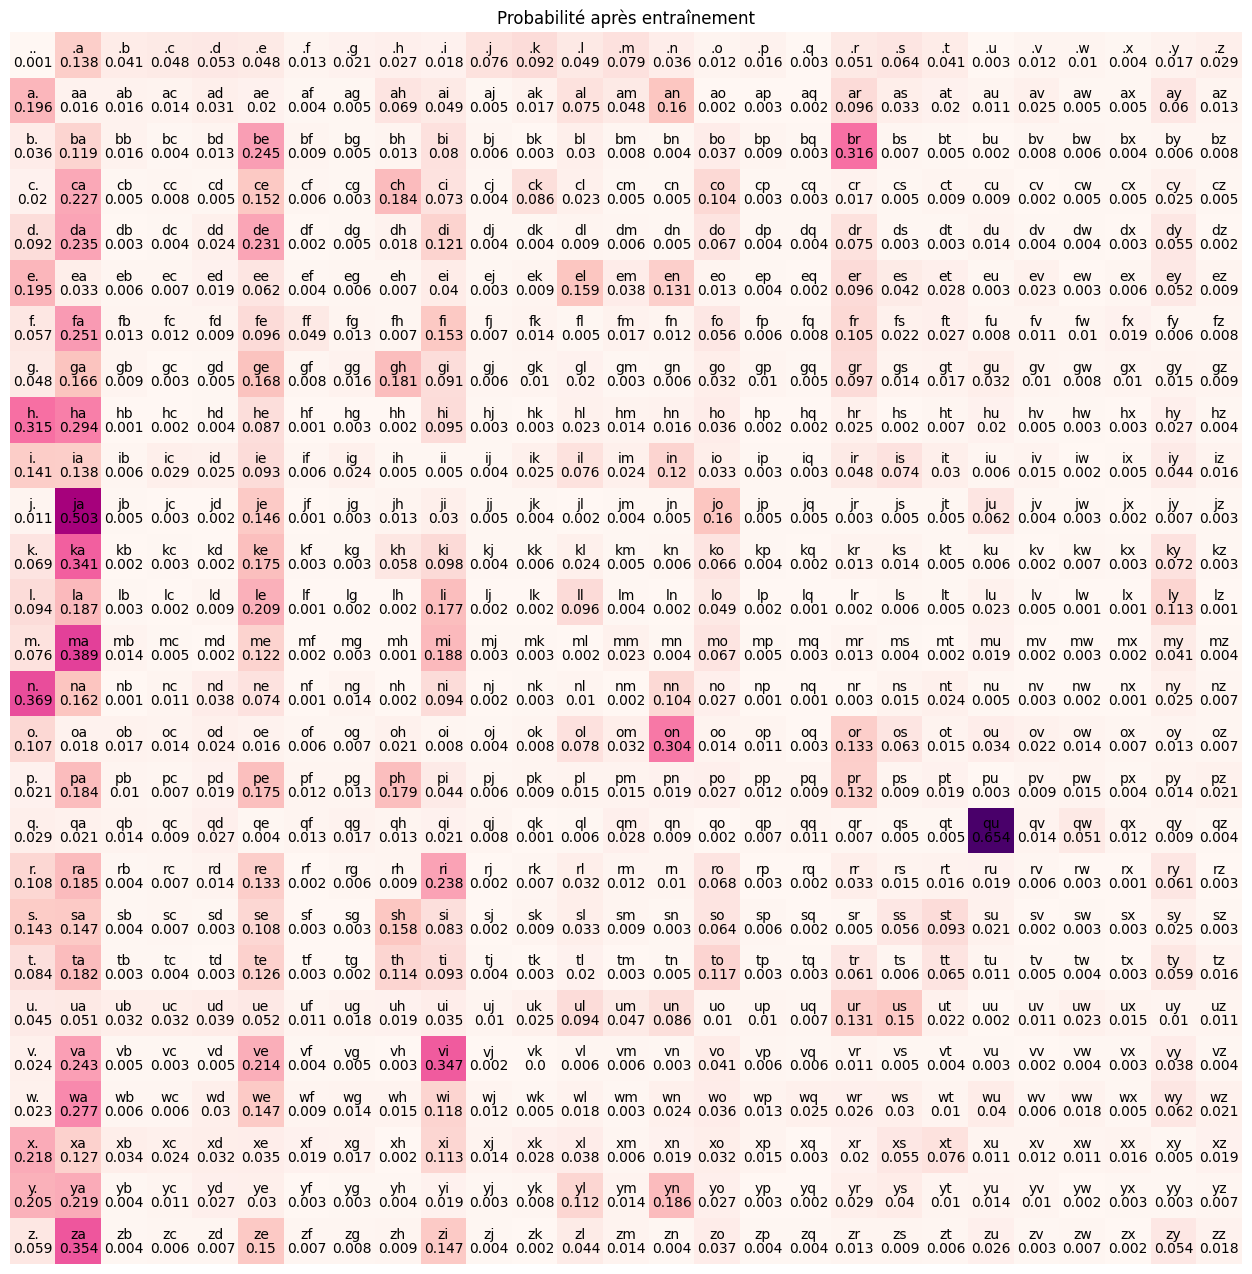

In [467]:
plt.figure(figsize=(16,16))
W.requires_grad = False
W_proba = W.exp() / W.exp().sum(1, keepdim=True)
plt.imshow(W_proba, cmap='RdPu')
for i in range(27):
  for j in range(27):
    lettres = i_to_c[i] + i_to_c[j]
    plt.text(j,i,lettres, ha='center', va="bottom")
    n = round(W_proba[i, j].item(), 3)
    plt.text(j,i,n , ha='center', va="top")
plt.axis('off')
plt.title("Probabilité après entraînement")
plt.show()

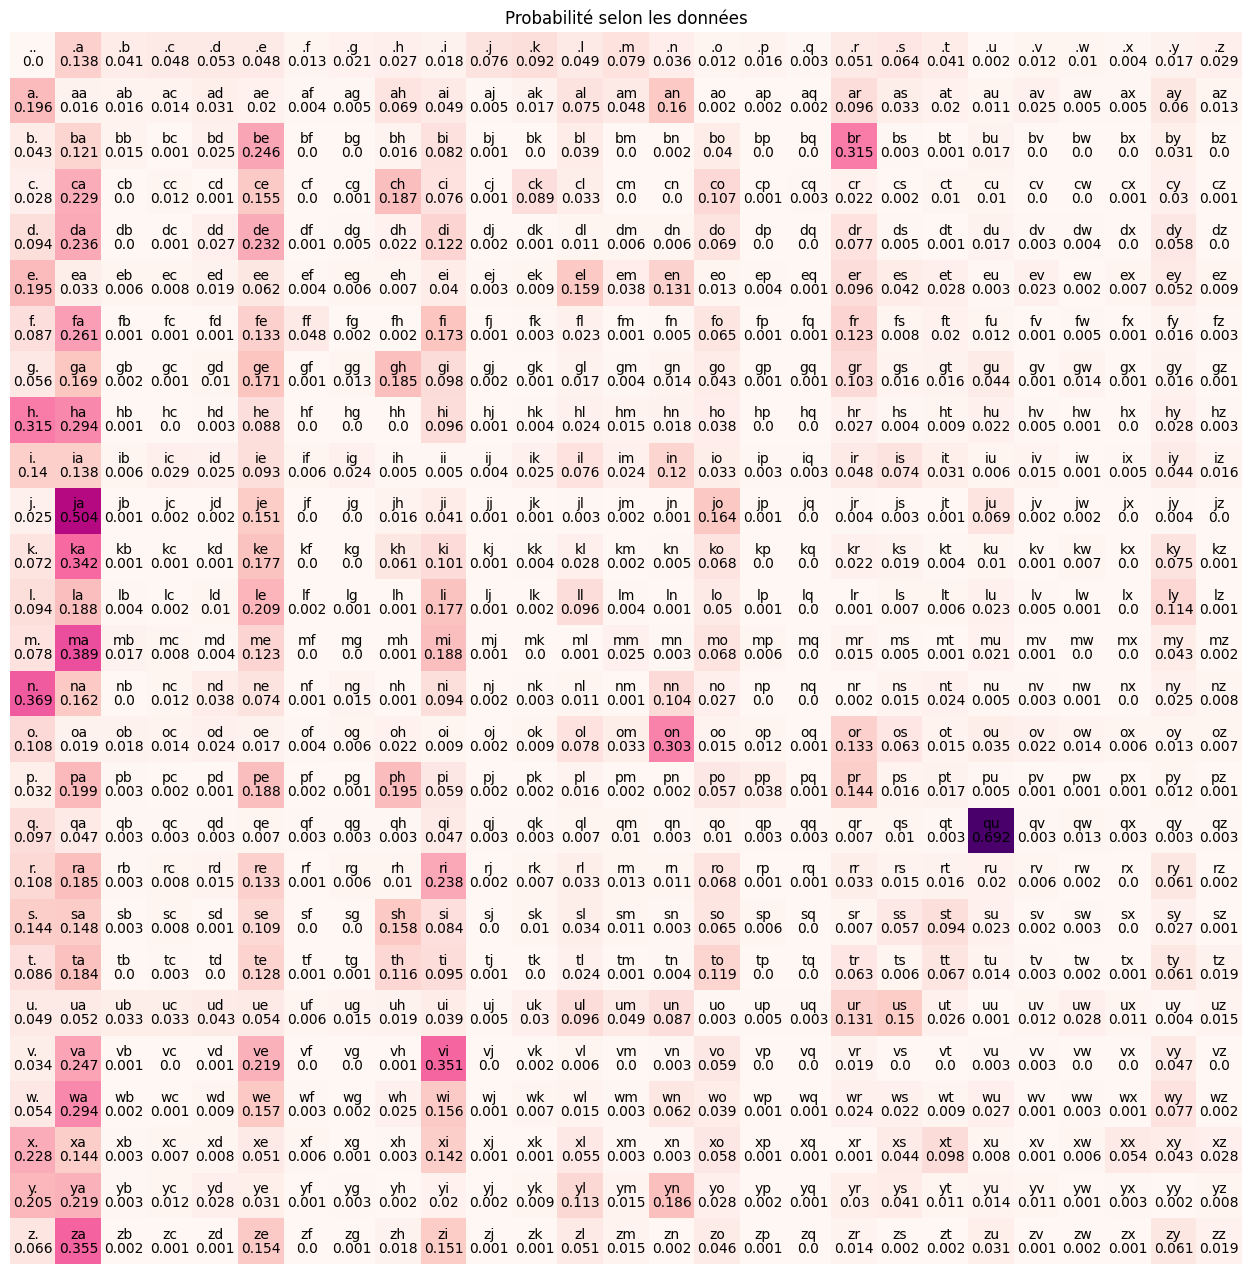

In [468]:
plt.figure(figsize=(16,16))
plt.imshow(P, cmap='RdPu')
for i in range(27):
  for j in range(27):
    lettres = i_to_c[i] + i_to_c[j]
    plt.text(j,i,lettres, ha='center', va="bottom")
    n = round(P[i, j].item(), 3)
    plt.text(j,i,n , ha='center', va="top")
plt.axis('off')
plt.title("Probabilité selon les données")
plt.show()

# Génération de nom avec le résaux de neuronne

In [469]:
g = torch.Generator().manual_seed(22)
for i in range(5):
  sortie = []
  i = 0
  while True:
    xenc = F.one_hot(torch.tensor([i]), num_classes=27).float()
    logits = xenc @ W
    comptes = logits.exp()
    p = comptes/ comptes.sum(1, keepdim=True)

    i = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    if i == 0:
      break
    sortie.append(i_to_c[i])
  print(''.join(sortie))

ffch
ydslo
raieviamanthylesh
rd
gprysai
